<a href="https://colab.research.google.com/github/FranklinAkogwu/portfolio/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset directly from UCI repository or kaggle
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url_red, sep=";")
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Check dataset info and missing balues
print(wine_data.info())
print(wine_data.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False   

In [5]:
# Summary Stats
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

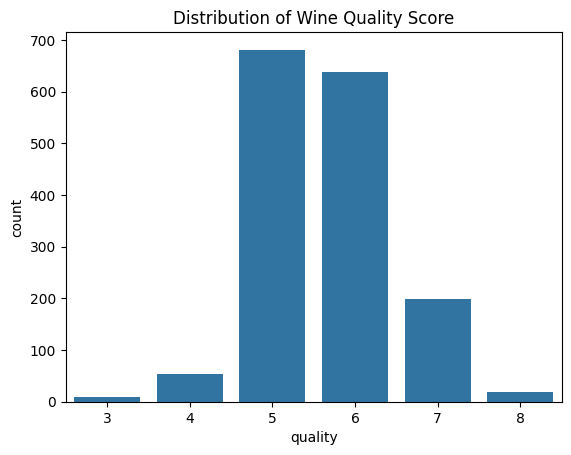

In [6]:
# Distribution of target variables 'Quality'
sns.countplot(x='quality', data=wine_data)
plt.title("Distribution of Wine Quality Score")
plt.show()

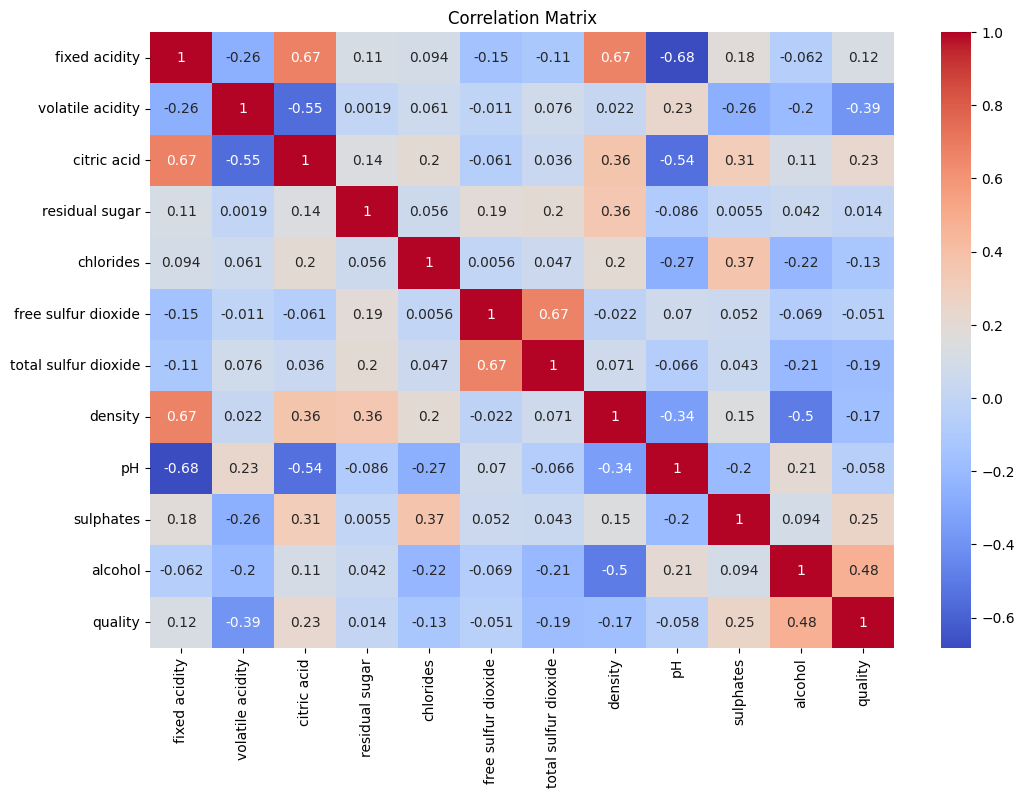

In [7]:
# Correlation heatmap to identify relationships between features and quality
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seperate features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Optionally convert quality to classification labels (e.g Low, Medium, High)
# For classifications:
# y = pd.cut(y, bins=[2,5,7,10], labels=['low', 'medium', 'high'])

# SPlit into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training and tes data prepared and scaled.")


Training and tes data prepared and scaled.


In [13]:
# Model Training and Evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#initiate Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train Model
rf_regressor.fit(X_train_scaled, y_train)

#Predict on test set
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression MSE: {mse:.3f}")
print(f"Random Forest Regression R^2: Score: {r2:.3f}")


Random Forest Regression MSE: 0.301
Random Forest Regression R^2: Score: 0.540


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


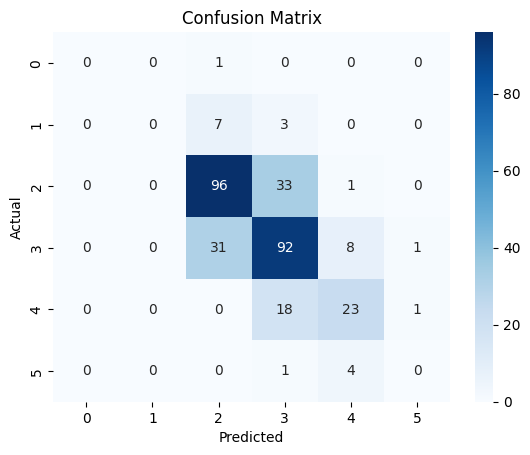

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# If classification, ensure y is categorical (e.g., low, medium, high)
# Example assumes y is already categorical from Step 3

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train model
rf_classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_class = rf_classifier.predict(X_test_scaled)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize model with class weights
rf_classifier = RandomForestClassifier(
    class_weight='balanced',  # Adjusts weights inversely proportional to class frequencies
    random_state=42
)

rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)

print("Classification Report with Class Weights:")
print(classification_report(y_test, y_pred))


Classification Report with Class Weights:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.78      0.75       130
           6       0.64      0.70      0.67       132
           7       0.70      0.50      0.58        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.65      0.68      0.66       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
!pip install imbalanced-learn  # Run this first in Colab

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Create SMOTE + Classifier pipeline
smote_pipeline = make_pipeline(
    SMOTE(random_state=42, sampling_strategy='not majority'),
    RandomForestClassifier(random_state=42)
)

# Train and predict
smote_pipeline.fit(X_train_scaled, y_train)
y_pred_smote = smote_pipeline.predict(X_test_scaled)

print("Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))


Classification Report with SMOTE:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.21      0.40      0.28        10
           5       0.75      0.69      0.72       130
           6       0.66      0.64      0.65       132
           7       0.60      0.64      0.62        42
           8       0.20      0.20      0.20         5

    accuracy                           0.64       320
   macro avg       0.40      0.43      0.41       320
weighted avg       0.66      0.64      0.65       320



In [17]:
# Rebin quality into 3 categories
y_train_bin = pd.cut(y_train, bins=[0, 4, 6, 10], labels=['low', 'medium', 'high'])
y_test_bin = pd.cut(y_test, bins=[0, 4, 6, 10], labels=['low', 'medium', 'high'])

# Retrain model
rf_classifier_bin = RandomForestClassifier(random_state=42)
rf_classifier_bin.fit(X_train_scaled, y_train_bin)

# Evaluate
y_pred_bin = rf_classifier_bin.predict(X_test_scaled)
print("Simplified Classification Report:")
print(classification_report(y_test_bin, y_pred_bin))


Simplified Classification Report:
              precision    recall  f1-score   support

        high       0.69      0.57      0.63        47
         low       0.00      0.00      0.00        11
      medium       0.89      0.95      0.92       262

    accuracy                           0.87       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train regression model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_reg = rf_regressor.predict(X_test_scaled)
print(f"MSE: {mean_squared_error(y_test, y_pred_reg):.2f}")
print(f"R²: {r2_score(y_test, y_pred_reg):.2f}")

# Optional: Convert regression predictions to classes
y_pred_reg_class = np.round(y_pred_reg).astype(int)
print("\nRegression-to-Classification Report:")
print(classification_report(y_test, y_pred_reg_class))


MSE: 0.30
R²: 0.54

Regression-to-Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.69      0.77      0.73       130
           6       0.60      0.67      0.63       132
           7       0.53      0.38      0.44        42
           8       0.00      0.00      0.00         5

    accuracy                           0.64       320
   macro avg       0.31      0.30      0.30       320
weighted avg       0.60      0.64      0.62       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# Advanced approach combining multiple techniques
final_model = make_pipeline(
    SMOTE(random_state=42),
    RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_estimators=200  # Increased complexity
    )
)

final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)

print("Combined Approach Report:")
print(classification_report(y_test, y_pred_final))


Combined Approach Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.22      0.40      0.29        10
           5       0.73      0.71      0.72       130
           6       0.68      0.62      0.65       132
           7       0.62      0.71      0.67        42
           8       0.20      0.20      0.20         5

    accuracy                           0.65       320
   macro avg       0.41      0.44      0.42       320
weighted avg       0.67      0.65      0.66       320



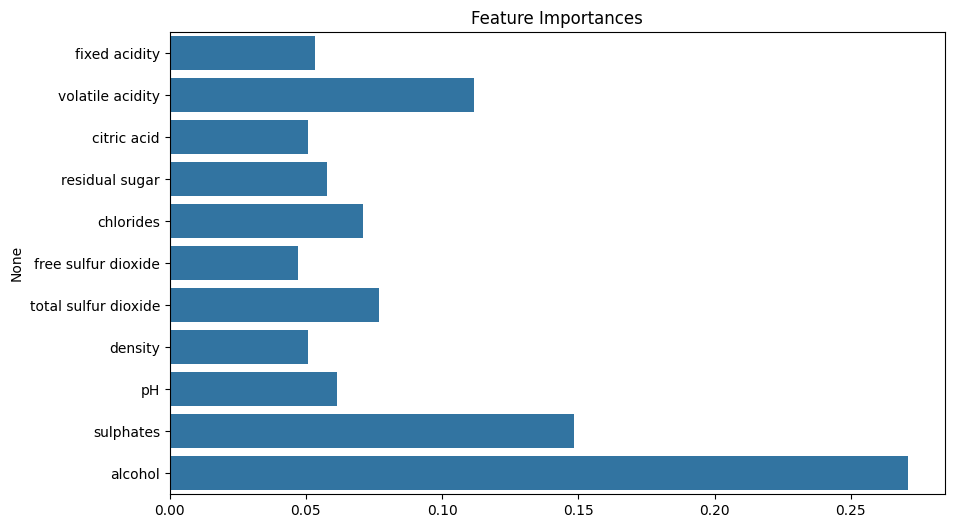

In [20]:
# Extract feature importances from Random Forest model
importances = rf_regressor.feature_importances_ if 'rf_regressor' in locals() else rf_classifier.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()


In [21]:
import joblib

# Save the trained model to a file
joblib.dump(rf_regressor if 'rf_regressor' in locals() else rf_classifier, 'wine_quality_model.pkl')
print("Model saved as 'wine_quality_model.pkl'")


Model saved as 'wine_quality_model.pkl'
